In [35]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import random
import scipy.optimize as op
import corner
import emcee
import pandas as pd
import corner
from pandasql import sqldf

In [50]:
data = pd.read_csv('result2')
data.keys()

/home/luiscantero/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (69,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['decals_id', 'ra', 'dec', 'elon', 'elat', 'glon', 'glat', 'mjd_min',
       'mjd_max', 'htm9',
       ...
       'nobs_r', 'nobs_z', 'anymask_g', 'anymask_r', 'anymask_z', 'allmask_g',
       'allmask_r', 'allmask_z', 'brickname', 'type'],
      dtype='object', length=115)

In [51]:
data

,decals_id,ra,dec,elon,elat,glon,glat,mjd_min,mjd_max,htm9,...,nobs_r,nobs_z,anymask_g,anymask_r,anymask_z,allmask_g,allmask_r,allmask_z,brickname,type
0,5497595108656072,286.578976,44.694369,300.428869,66.391005,75.298153,16.240068,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
1,5497595108656071,286.581590,44.694554,300.433448,66.390655,75.299066,16.238419,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
2,5497595108656189,286.592264,44.700596,300.455895,66.394298,75.307890,16.233697,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
3,5497595108656176,286.588875,44.699958,300.449675,66.394369,75.306322,16.235683,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
4,5497595108656067,286.586210,44.700882,300.445793,66.395793,75.306463,16.237786,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
5,5497595108656191,286.593603,44.703107,300.459954,66.396436,75.310686,16.233771,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,REX
6,5497595108656203,286.579200,44.701010,300.433950,66.397328,75.304615,16.242444,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
7,5497595108656270,286.584390,44.706226,300.446478,66.401283,75.311099,16.241013,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
8,5497595108656114,286.574717,44.696365,300.423030,66.393776,75.298878,16.243627,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF
9,5497595108656113,286.573210,44.696454,300.420528,66.394165,75.298540,16.244651,57522.458138,57541.422834,3344951,...,1,0,0,0,0,0,0,0,2864p447,PSF


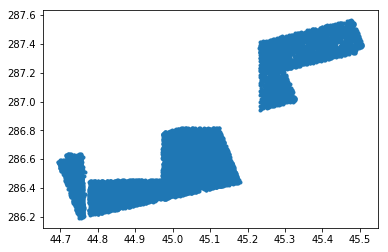

In [52]:
plt.plot(data.dec,data.ra, '.')

In [56]:
t1=[]
t2=[]
t3=[]
t4=[]

for i in range(0,len(data.dec)):
    if data.type[i] == "PSF":
        t1.append(1)
        

In [57]:
t1

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [38]:
q = """SELECT
            COUNT(type)
        FROM
            data
        WHERE
            type == "COMP";"""
print (sqldf(q, locals()))

   COUNT(type)
0         1000
